# Building a Multiple Linear Regression Model To Predict Toyota Corolla Price

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the Data

In [3]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\05. Multiple Linear Regression\ToyotaCorolla.csv", encoding='unicode_escape')

## Lets Explore the data & Check missing/null values

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Creating a new data frame by including only required features for building the model

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [6]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
data=df.loc[:, ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"] ]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
#Check for Missing values
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correlation Matrix

In [9]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

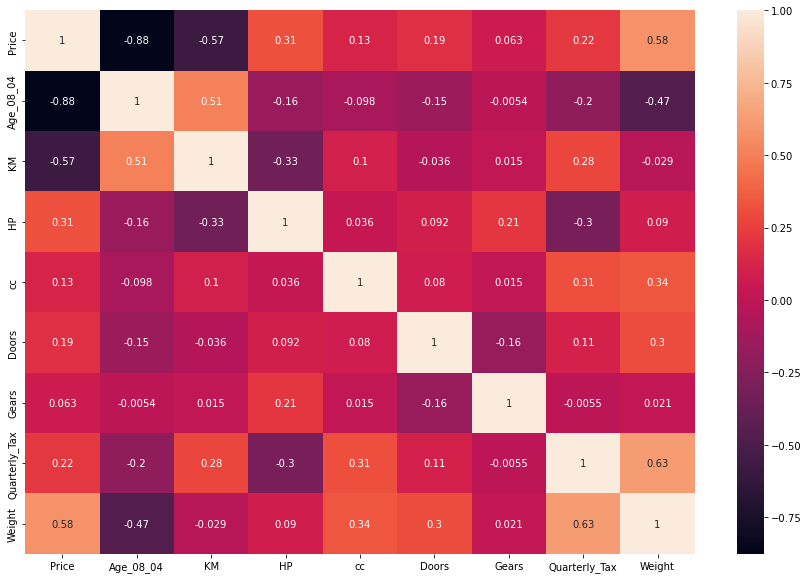

In [10]:
#Correlation Values Representation using HeatMap
plt.subplots(figsize=(15,10))
sns.heatmap(data=data.corr(), annot=True)

# HeatMap Summary
**1. From the heatmap values we can observe that the correlatiion of Price vs Weight is very low that is 0.063**

**2. Price vs Age of the car highly negatively correlated, Correlation value is -0.88, here we can say that the Price of the car is highly influenced by the Age of the car**


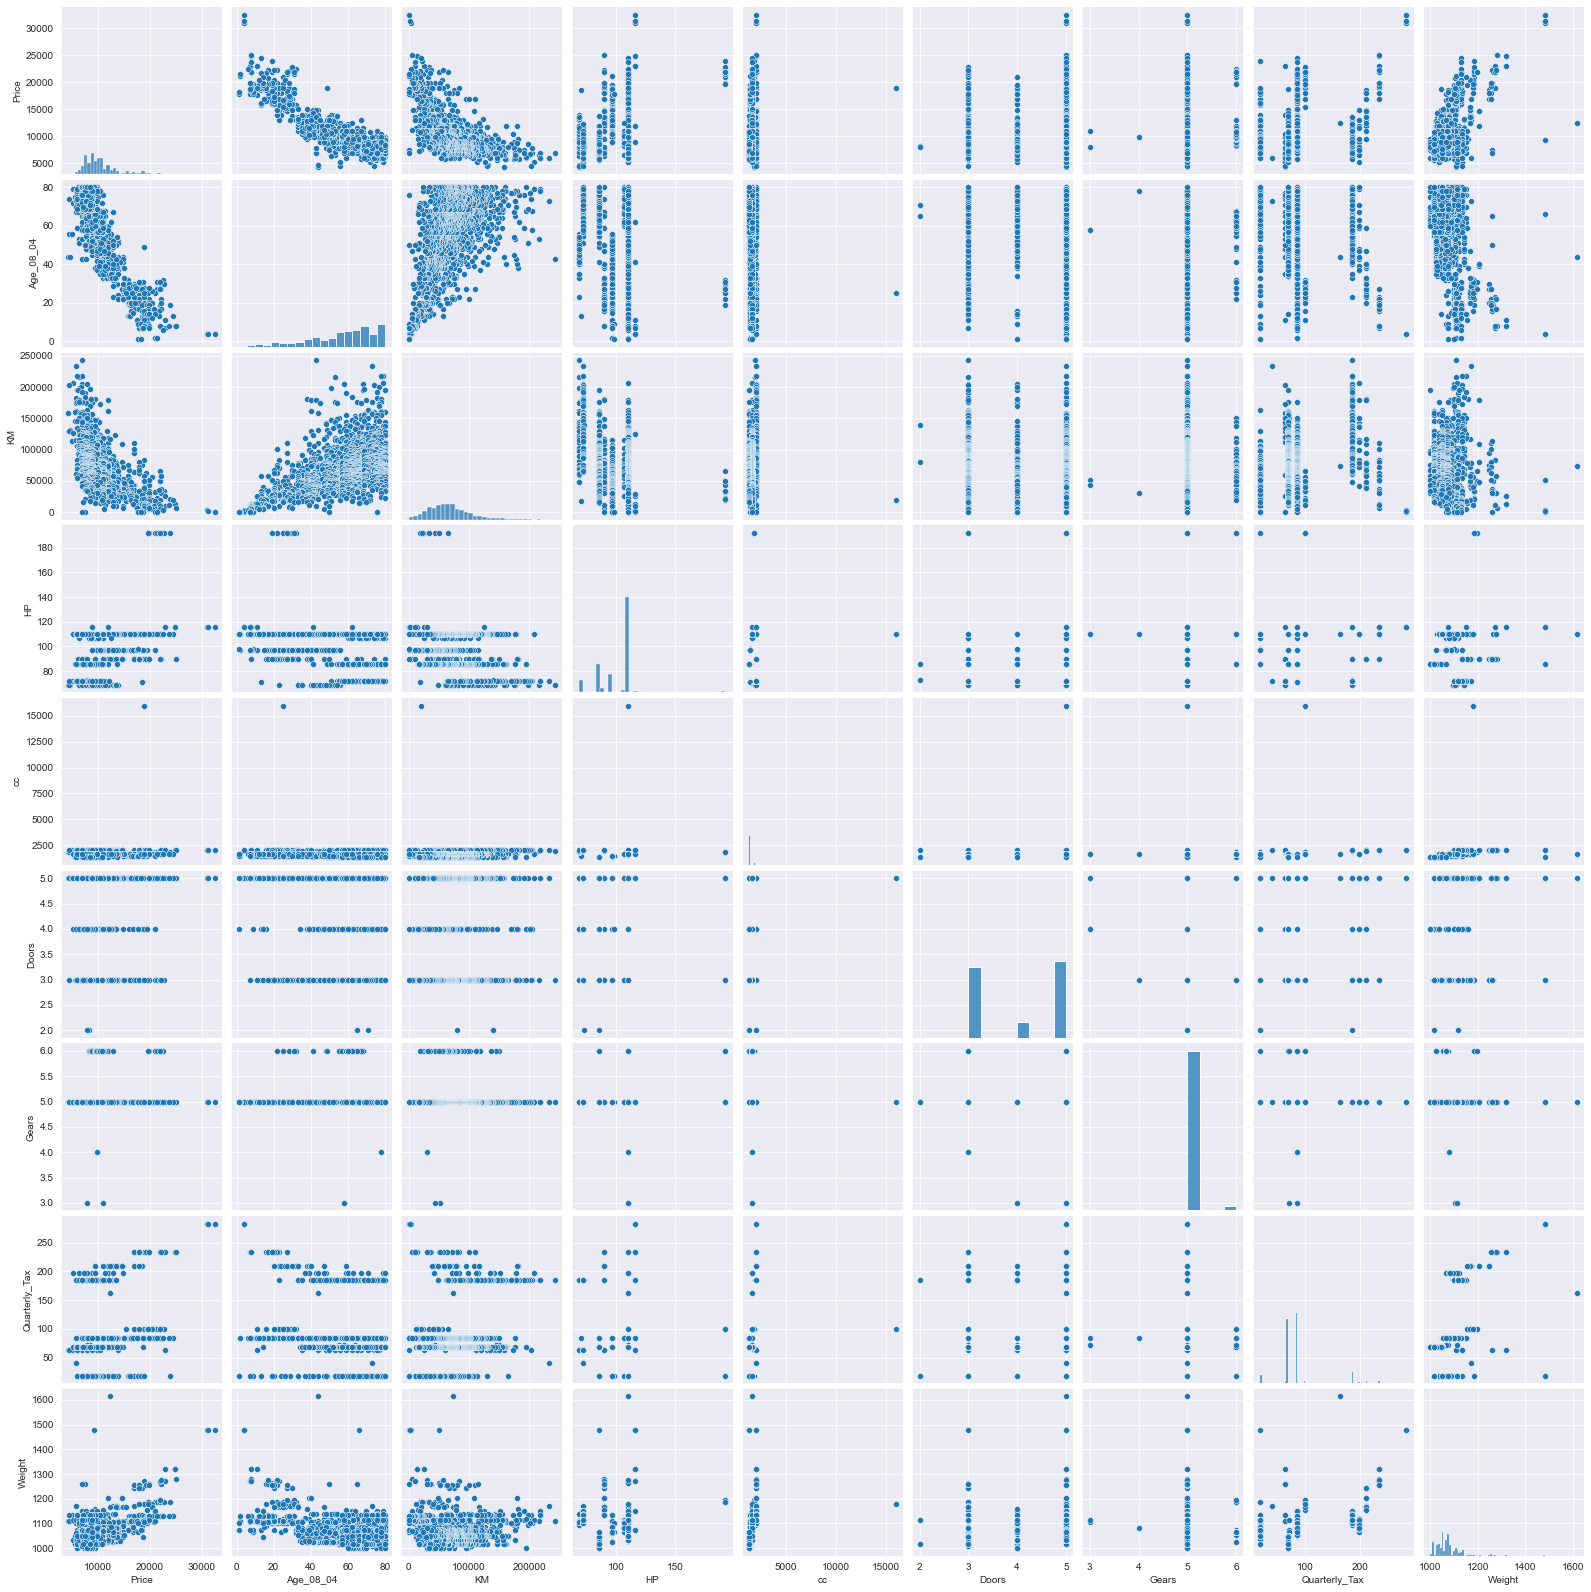

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# PairPlot Summary

**From the Scatterplot We can observe that Only Age of the Car is Highly Negatively Correlated with Price, other plots are looks like random no proper patterns to determine the exact relationship or association with respect to Price**

## X and Y Variable data split

In [12]:
X=data.iloc[:,1:]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [13]:
y=data.iloc[:,0:1]
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


# Splitting the  Data 

In [14]:
# Splitting Data, Training Data is 80% and Testing Data is 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)


data=pd.DataFrame(X_train)
train_data=data.assign(Price=y_train)
train_data.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
609,67,174833,72,2000,4,5,185,1100,5751
511,51,53408,110,1600,5,5,85,1080,11900
878,60,61977,86,1300,3,5,69,1015,8500
960,66,50806,86,1300,3,5,19,1480,9390
303,39,39524,97,1398,3,5,69,1025,11500


# Preparing the model

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=train_data).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     985.7
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:00:11   Log-Likelihood:                -9857.3
No. Observations:                1148   AIC:                         1.973e+04
Df Residuals:                    1139   BIC:                         1.978e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6927.7998   1498.308     -4.624      0.000   -9867.553   -3988.046
Age_08_04      -121.1383      2.849    -42.523      0.000    -126.728    -115.549
KM               -0.0184      0.001    -12.766      0.000      -0.021      -0.016
HP               33.2294      3.349      9.923      0.000      26.659      39.800
cc               -2.0029      0.337     -5.938      0.000      -2.665      -1.341
Doors           -28.1967     43.499     -0.648      0.517    -113.543      57.150
Gears           609.5518    207.081      2.944      0.003     203.250    1015.854
Quarterly_Tax     7.2798      1.609      4.525      0.000       4.123      10.436
Weight           20.4163      1.196     17.065      0.000      18.069      22.764
==============================================================================
Omnibus:                      219.967   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2954.715
Skew:                          -0.460   Prob(JB):                         0.00
Kurtosis:                      10.806   Cond. No.                     3.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
predictions=pd.DataFrame(model.predict(X_test))
predictions

,0
651,8289.009898
411,10517.002275
342,13010.622495
1298,7666.595660
483,10486.851572
...,...
1029,11406.050031
520,10421.958139
996,10104.782312
333,12776.962274


## Y_Actual data vs Y_Predicted Residual Data Representation

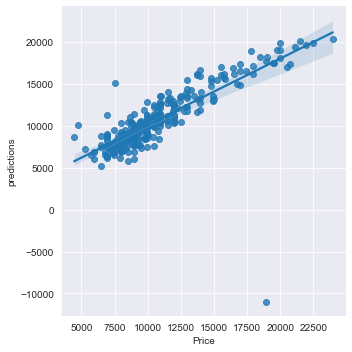

In [19]:
# Regression Plot With Y_Actual Vs Y_Predicted

data=pd.DataFrame(y_test)
data1=data.assign(predictions=predictions)

sns.lmplot(x='Price', y='predictions', data=data1)


## Calculating Variance Inflation Factor(VIF)

In [20]:
age_r=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=train_data).fit().rsquared
age_vif=1/(1-age_r)

KM_r=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=train_data).fit().rsquared
KM_vif=1/(1-KM_r)

HP_r=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data=train_data).fit().rsquared
HP_vif=1/(1-HP_r)

cc_r=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=train_data).fit().rsquared
cc_vif=1/(1-cc_r)

Doors_r=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=train_data).fit().rsquared
Doors_vif=1/(1-Doors_r)

Gears_r=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data=train_data).fit().rsquared
Gears_vif=1/(1-Gears_r)

Tax_r=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data=train_data).fit().rsquared
Tax_vif=1/(1-Tax_r)

Weight_r=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data=train_data).fit().rsquared
Weight_vif=1/(1-Weight_r)

v={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[age_vif,KM_vif,HP_vif,cc_vif,Doors_vif,Gears_vif,Tax_vif,Weight_vif] }
VIF=pd.DataFrame(v)
VIF

,Variables,VIF
0,Age_08_04,1.910575
1,KM,1.989301
2,HP,1.610614
3,cc,2.728378
4,Doors,1.162142
5,Gears,1.117511
6,Quarterly_Tax,2.985454
7,Weight,2.807861


# Summary

The model score is 87.4%, and all the VIF are lesser than 5.

## Simple Linear Regression models of All independent variables with Price

In [21]:
AgeM=smf.ols('Price~Age_08_04', data=train_data).fit()
print('t value is:',AgeM.tvalues , '\n', 'p value is:', AgeM.pvalues )

t value is: Intercept    126.023129
Age_08_04    -62.968052
dtype: float64 
 p value is: Intercept    0.0
Age_08_04    0.0
dtype: float64


In [22]:
KMM=smf.ols('Price~KM', data=train_data).fit()
print('t value is:',KMM.tvalues , '\n', 'p value is:', KMM.pvalues )

t value is: Intercept    78.529722
KM          -23.424274
dtype: float64 
 p value is: Intercept    0.000000e+00
KM           1.817344e-99
dtype: float64


In [23]:

HPM=smf.ols('Price~HP', data=train_data).fit()
print(' t value is: ', HPM.tvalues, '\n', 'p value is: ', HPM.pvalues)

 t value is:  Intercept     4.359871
HP           10.575057
dtype: float64 
 p value is:  Intercept    1.418315e-05
HP           5.284899e-25
dtype: float64


In [24]:
ccM=smf.ols('Price~cc', data=train_data).fit()
print('t value is:', ccM.tvalues, '\n', 'p value is:', ccM.pvalues)

t value is: Intercept    6.204217
cc           5.891243
dtype: float64 
 p value is: Intercept    7.665293e-10
cc           5.032802e-09
dtype: float64


In [25]:

DoorsM=smf.ols('Price~Doors', data=train_data).fit()
print('t value is:', DoorsM.tvalues,'\n','p value is:', DoorsM.pvalues )

t value is: Intercept    16.827440
Doors         6.520552
dtype: float64 
 p value is: Intercept    5.932537e-57
Doors        1.048047e-10
dtype: float64


In [26]:
GearsM=smf.ols('Price~Gears', data=train_data).fit()
print('t value is:', GearsM.tvalues, '\n', 'p value is:', GearsM.pvalues)

t value is: Intercept    1.685128
Gears        2.203324
dtype: float64 
 p value is: Intercept    0.092236
Gears        0.027770
dtype: float64


In [27]:
TaxM=smf.ols('Price~Quarterly_Tax', data=train_data).fit()
print('t value is; ', TaxM.tvalues,'\n', 'p value is', TaxM.pvalues)

t value is;  Intercept        36.176043
Quarterly_Tax     8.419618
dtype: float64 
 p value is Intercept        8.944937e-192
Quarterly_Tax     1.115463e-16
dtype: float64


In [28]:
WeightM=smf.ols('Price~Weight', data=train_data).fit()
print('t value is:', WeightM.tvalues, '\n', 'p value is: ', WeightM.pvalues)

t value is: Intercept   -18.721514
Weight       24.945363
dtype: float64 
 p value is:  Intercept     1.909262e-68
Weight       4.630587e-110
dtype: float64


## Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

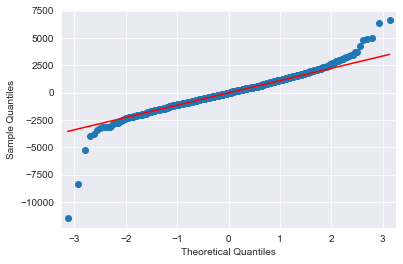

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')

## From the above Q-Q plot we can see that the line passing through the maximum points, it is very much close to the normal, hence we dont have to deal with outlier points

## Homoscedasticity Checking with Scatterplot

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Error Values')

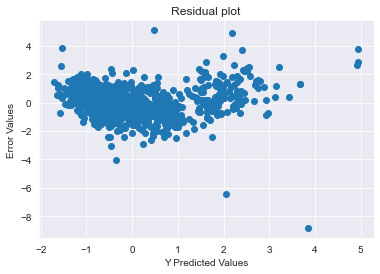

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))


plt.title("Residual plot")
plt.xlabel("Y Predicted Values")
plt.ylabel("Error Values")

## From the above scatter plot we can observe that the Error is constant 

# Residual Vs Regressors

eval_env: 1


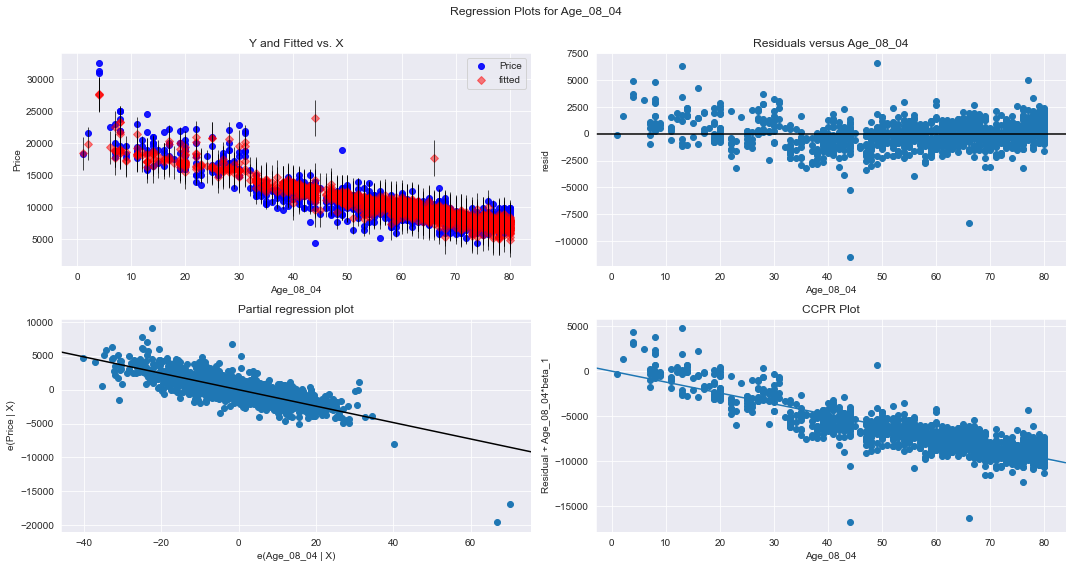

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Age_08_04', fig=fig) 

eval_env: 1


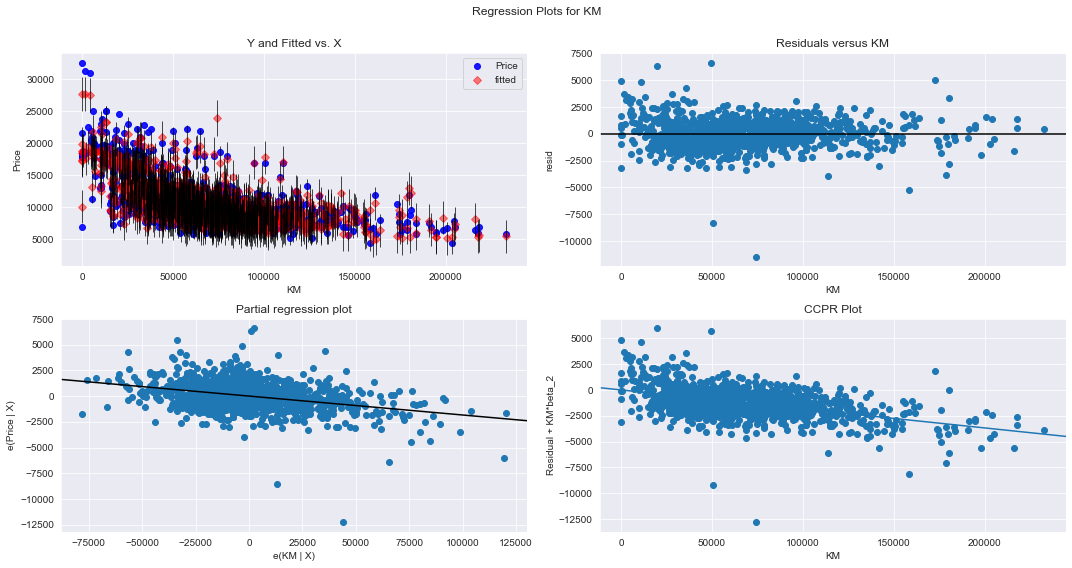

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'KM', fig=fig)

eval_env: 1


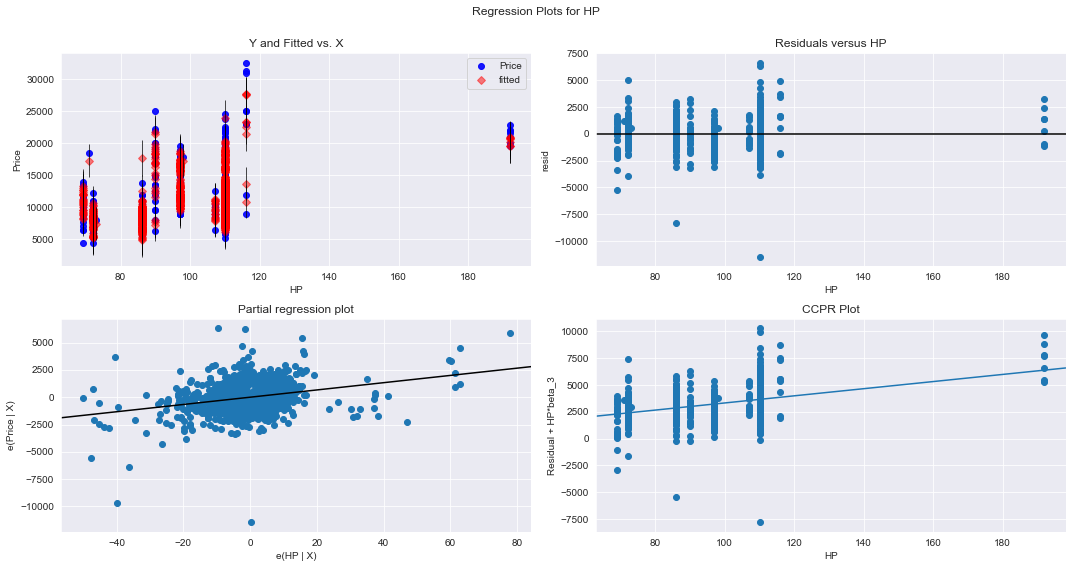

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'HP', fig=fig)

eval_env: 1


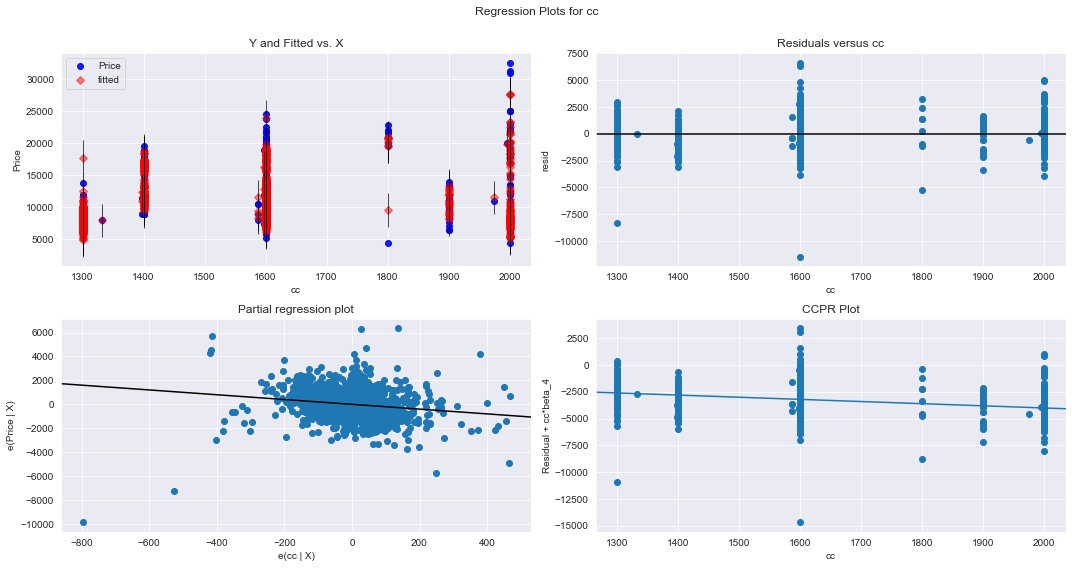

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'cc', fig=fig)

eval_env: 1


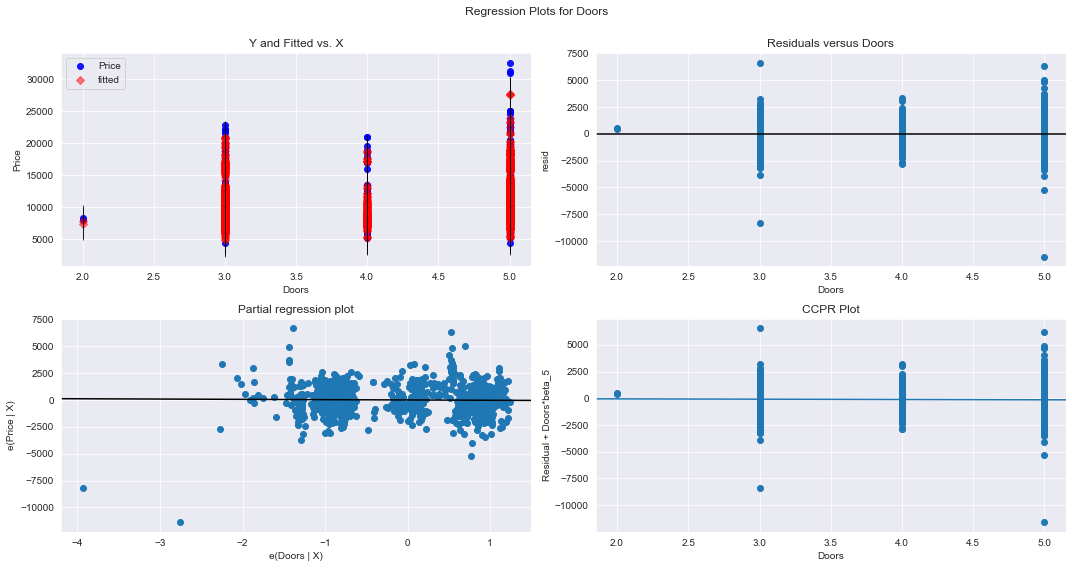

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)

eval_env: 1


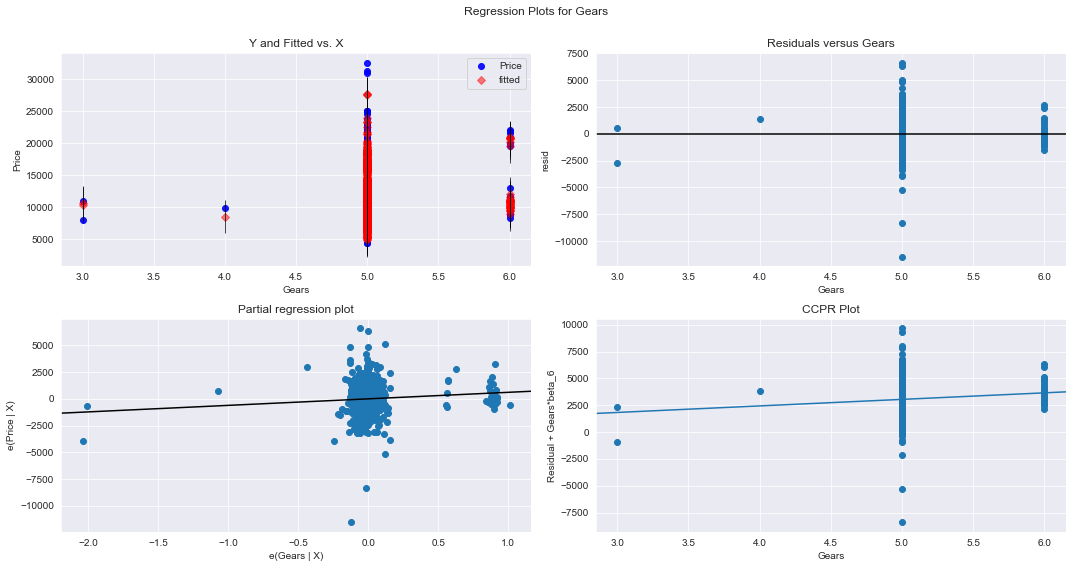

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)

eval_env: 1


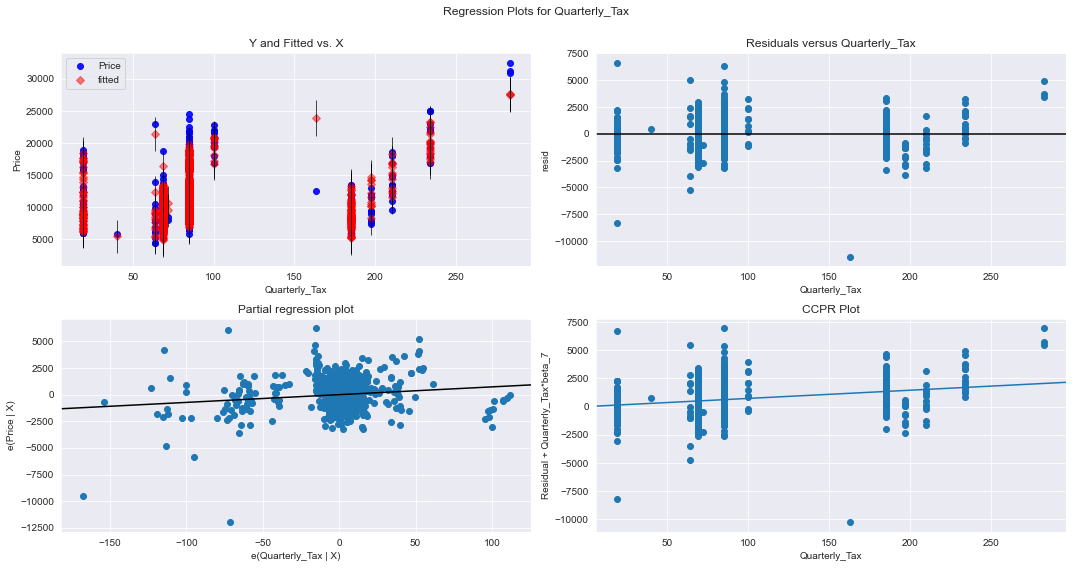

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig=fig)

eval_env: 1


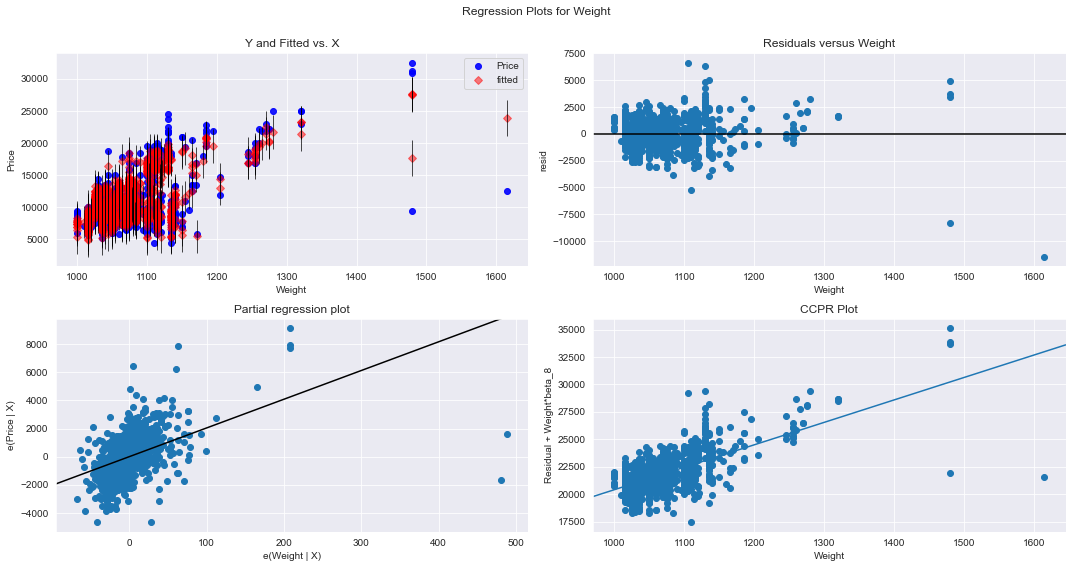

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)

## Model Detection Diagnostics

### Detecting Influencers/Outliers

# Cooks Distance

In [43]:
model_influence=model.get_influence()

In [44]:
(c,_)=model_influence.cooks_distance

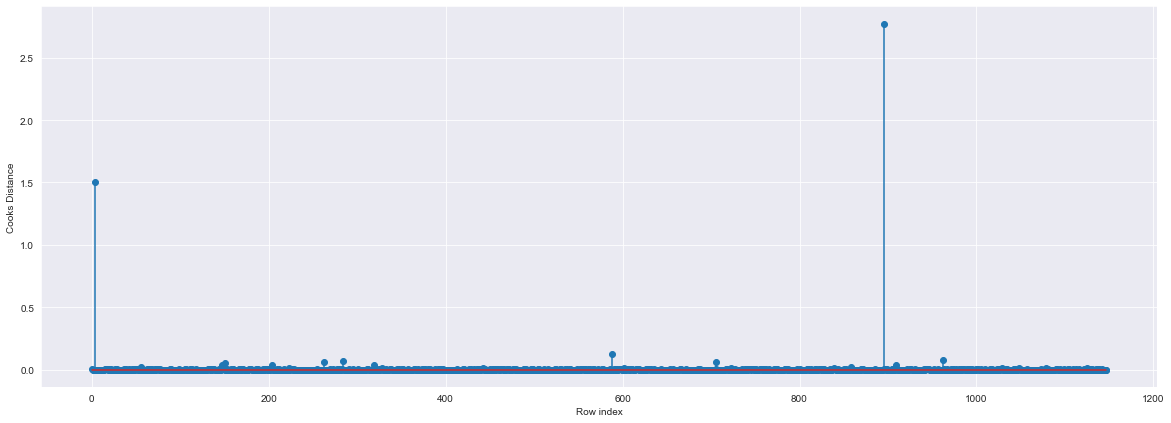

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## From the above Cooks Distance Stem plot there are two ouliers found

In [52]:
#index and value of influencer where c is more than 2.0
(np.argmax(c),np.max(c))

(896, 2.773526889099806)

# High Influence Points

<function matplotlib.pyplot.show(close=None, block=None)>

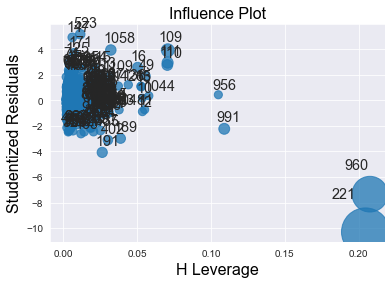

In [51]:
# from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show

### From the above Influence plot we found that there are two outliers with index numbers as 960,221

In [57]:
k = train_data.shape[1]
n = train_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02613240418118467

In [62]:
#Improving the model
#Discard the data points which are influencers/Outliers and reasign the row number (reset_index())
#Dropping index no 49 row data from the dataframe
train_data1=train_data.drop(index=960,axis=0) 
train_data1=train_data1.drop(index=221, axis=0)
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 609 to 684
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1146 non-null   int64
 1   KM             1146 non-null   int64
 2   HP             1146 non-null   int64
 3   cc             1146 non-null   int64
 4   Doors          1146 non-null   int64
 5   Gears          1146 non-null   int64
 6   Quarterly_Tax  1146 non-null   int64
 7   Weight         1146 non-null   int64
 8   Price          1146 non-null   int64
dtypes: int64(9)
memory usage: 89.5 KB


In [67]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=train_data1).fit()

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:52:41   Log-Likelihood:                -9733.7
No. Observations:                1146   AIC:                         1.949e+04
Df Residuals:                    1137   BIC:                         1.953e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.797e+04   1546.848    -11.618      0.000    -2.1e+04   -1.49e+04
Age_08_04      -110.3740      2.691    -41.009      0.000    -115.655    -105.093
KM               -0.0172      0.001    -13.064      0.000      -0.020      -0.015
HP               29.3459      3.073      9.550      0.000      23.317      35.375
cc               -3.4945      0.322    -10.836      0.000      -4.127      -2.862
Doors          -149.1482     40.474     -3.685      0.000    -228.561     -69.736
Gears           547.9567    188.767      2.903      0.004     177.587     918.327
Quarterly_Tax     1.4905      1.524      0.978      0.328      -1.499       4.480
Weight           33.8602      1.404     24.110      0.000      31.105      36.616
==============================================================================
Omnibus:                       66.072   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.564
Skew:                           0.233   Prob(JB):                     1.26e-43
Kurtosis:                       4.980   Cond. No.                     3.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary data the P value for Quarterly_Tax is Extremely high, i.e accept null hypothesis ( coef of Quarterly_Tax=0), so removing the Quarterly_Tax for the optimal model

In [69]:
model_final=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data=train_data1).fit()

In [71]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1389.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:14:30   Log-Likelihood:                -9734.2
No. Observations:                1146   AIC:                         1.948e+04
Df Residuals:                    1138   BIC:                         1.952e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.858e+04   1416.162    -13.120      0.000   -2.14e+04   -1.58e+04
Age_08_04   -110.4120      2.691    -41.028      0.000    -115.692    -105.132
KM            -0.0171      0.001    -13.031      0.000      -0.020      -0.015
HP            27.9510      2.722     10.269      0.000      22.610      33.292
cc            -3.3835      0.302    -11.209      0.000      -3.976      -2.791
Doors       -152.5457     40.324     -3.783      0.000    -231.664     -73.428
Gears        560.1011    188.354      2.974      0.003     190.541     929.662
Weight        34.4692      1.259     27.382      0.000      31.999      36.939
==============================================================================
Omnibus:                       63.620   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.757
Skew:                           0.201   Prob(JB):                     3.10e-43
Kurtosis:                       4.985   Cond. No.                     3.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
print('Model Rsquared value (model with original train dataset) is:', model.rsquared, '\n', 'AIC value is: ', model.aic, '\n', 'BIC value is:',model.bic)

Model Rsquared value (model with original train dataset) is: 0.8737898828869015 
 AIC value is:  19732.607252175538 
 BIC value is: 19778.019241367452


In [78]:
print('Model1 Rsquared value (removed outliers) is:', model1.rsquared, '\n', 'AIC value is: ', model1.aic, '\n', 'BIC value is:',model1.bic)

Model1 Rsquared value (removed outliers) is: 0.8953352354893485 
 AIC value is:  19485.388304633885 
 BIC value is: 19530.784600709358


In [79]:
print('Model1 Rsquared value (removed outliers & Quarterly_Tax) is:', model_final.rsquared, '\n', 'AIC value is: ', model_final.aic, '\n', 'BIC value is:',model_final.bic)

Model1 Rsquared value (removed outliers & Quarterly_Tax) is: 0.8952471644390598 
 AIC value is:  19484.35221052858 
 BIC value is: 19524.704473706777


## All the P values are less than 0.05 and also VIF values are less than 5, and We have got lower AIC & BIC, Rsqaure Values for Model_final,  so the above model is the optimal model to predict the price of Toyota Corolla car